In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import plotly.express as px
import plotly.graph_objs as go

In [2]:
pwd = os.getcwd()
data_wd = pwd+"/Dataset_Question3/"

os.chdir(data_wd)
AgeGroup = pd.read_csv('AgeGroupDetails.csv')
CovidIndia = pd.read_csv('covid_19_india.csv',parse_dates=True,squeeze=True)
HospitalBeds = pd.read_csv('HospitalBedsIndia.csv')
ICMRTesting = pd.read_csv('ICMRTestingDetails.csv')
IndividualDetails = pd.read_csv('IndividualDetails.csv')
PopulationCensus = pd.read_csv('population_india_census2011.csv',thousands=',')
StatewiseTestingData = pd.read_csv('StatewiseTestingDetails.csv', parse_dates=True)
os.chdir(pwd)

In [3]:
indx_maxAgeGroup = AgeGroup['TotalCases'].idxmax()

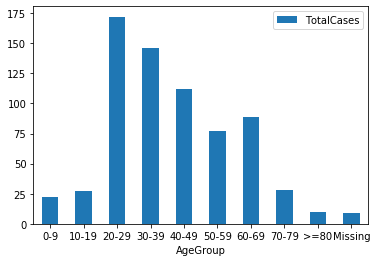

In [4]:
AgeGroupPlot = AgeGroup.plot.bar(x='AgeGroup', y='TotalCases', rot=0)

In [5]:
print('Age Group with maximum cases is {} with {} cases, constituting {} of total cases'.format(AgeGroup['AgeGroup'][indx_maxAgeGroup],AgeGroup['TotalCases'][indx_maxAgeGroup],AgeGroup['Percentage'][indx_maxAgeGroup]))

Age Group with maximum cases is 20-29 with 172 cases, constituting 24.86% of total cases


In [6]:
time = CovidIndia['Date']
ConfirmedCases = CovidIndia['Confirmed']
StateWiseData = CovidIndia.groupby(["State/UnionTerritory"])

In [7]:
now  = datetime.datetime.now()
CovidIndia['Date'] = pd.to_datetime(CovidIndia['Date'], format='%d/%m/%y')
CovidIndia = CovidIndia[['Date','State/UnionTerritory','Cured','Deaths','Confirmed']]
Spread = CovidIndia.groupby(['Date', 'State/UnionTerritory'])['Confirmed'].sum().reset_index().sort_values('Confirmed', ascending=False)

/home/kamesh-k/anaconda3/envs/ML/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Text(0.5, 1.0, 'India Observed cases')

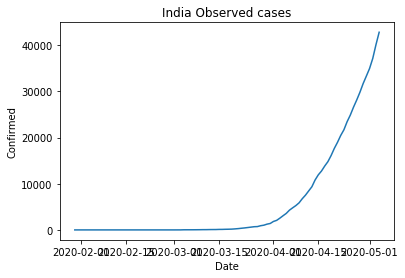

In [8]:
graph = CovidIndia.groupby('Date')['Cured', 'Deaths', 'Confirmed'].sum().reset_index()
sns.lineplot(graph['Date'],graph['Confirmed']).set_title("India Observed cases")

In [9]:
spread = CovidIndia.groupby(['Date', 'State/UnionTerritory'])['Confirmed'].sum().reset_index().sort_values('Date', ascending=True).sort_values('Confirmed', ascending=True)
fig = px.area(spread, x="Date", y="Confirmed",color='State/UnionTerritory',title='Pan India State Wise Confirmed over time',height=500,
              color_discrete_sequence = px.colors.cyclical.Edge)
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',width=700, height=600)

In [10]:
spread= spread.sort_values('Date', ascending=True)
fig = px.line(spread, x="Date", y="Confirmed",color='State/UnionTerritory',title='State Wise Confirmed over time',height=500,
              color_discrete_sequence = px.colors.cyclical.HSV)
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',width=700, height=600)

/home/kamesh-k/anaconda3/envs/ML/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Text(0.5, 1.0, 'India Recovered cases')

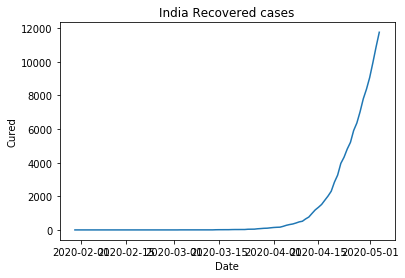

In [11]:
graph = CovidIndia.groupby('Date')['Cured', 'Deaths', 'Confirmed'].sum().reset_index()
sns.lineplot(graph['Date'],graph['Cured']).set_title("India Recovered cases")

In [12]:
spread = CovidIndia.groupby(['Date', 'State/UnionTerritory'])['Cured'].sum().reset_index().sort_values('Date', ascending=True)
fig = px.area(spread, x="Date", y="Cured",color='State/UnionTerritory',title='Pan India State Wise Recovered over time',height=500,
              color_discrete_sequence = px.colors.cyclical.Edge)
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',width=700, height=600)

In [13]:
spread = CovidIndia.groupby(['Date', 'State/UnionTerritory'])['Cured'].sum().reset_index().sort_values('Date', ascending=True)
fig = px.line(spread, x="Date", y="Cured",color='State/UnionTerritory',title='State Wise Recovered over time',height=500,
              color_discrete_sequence = px.colors.cyclical.HSV)
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',width=700, height=600)

/home/kamesh-k/anaconda3/envs/ML/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Text(0.5, 1.0, 'India Death cases')

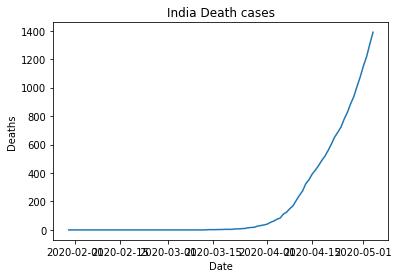

In [14]:
graph = CovidIndia.groupby('Date')['Cured', 'Deaths', 'Confirmed'].sum().reset_index()
sns.lineplot(graph['Date'],graph['Deaths']).set_title("India Death cases")

In [15]:
spread = CovidIndia.groupby(['Date', 'State/UnionTerritory'])['Deaths'].sum().reset_index().sort_values('Date', ascending=True)
fig = px.area(spread, x="Date", y="Deaths",color='State/UnionTerritory',title='Pan India State Wise Death over time',height=500,
              color_discrete_sequence = px.colors.cyclical.Edge)
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',width=700, height=600)

In [16]:
fig = px.line(spread, x="Date", y="Deaths",color='State/UnionTerritory',title='State Wise Deaths over time',height=500,
              color_discrete_sequence = px.colors.cyclical.HSV)
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',width=700, height=600)

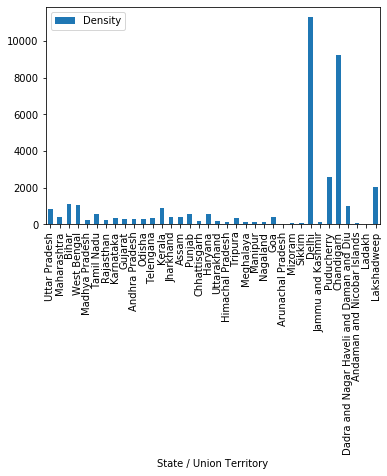

In [17]:
PopulationCensus['Density'] = PopulationCensus["Density"].str.split("/").str[0]
PopulationCensus['Density'] = PopulationCensus['Density'].str.replace(",", "").astype(float)
DensityPlot = PopulationCensus.plot.bar(x='State / Union Territory', y='Density')

Rajasthan
Odisha
Haryana
Jammu and Kashmir
Bihar
Karnataka
Maharashtra
Andhra Pradesh
Kerala
Gujarat
Uttarakhand
Goa
Punjab
Assam
Uttar Pradesh
Tamil Nadu
Andaman and Nicobar Islands
Delhi
Chhattisgarh
Chandigarh
Puducherry
Meghalaya
Himachal Pradesh


/home/kamesh-k/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Arunachal Pradesh
Nagaland
West Bengal
Mizoram
Madhya Pradesh
Jharkhand
Tripura
Ladakh
Telangana


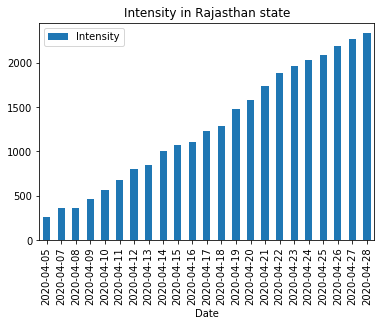

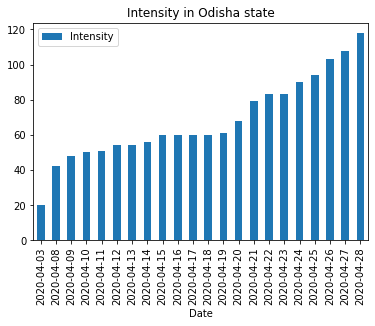

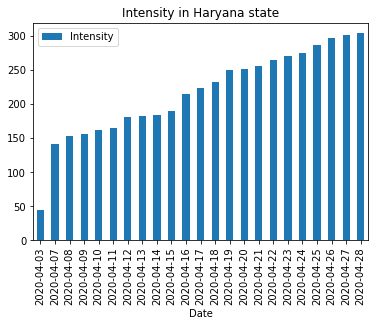

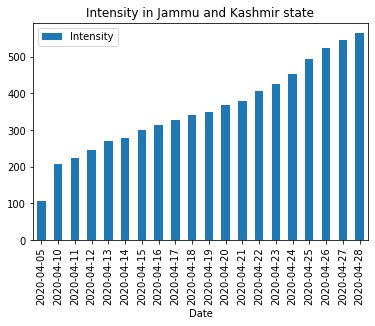

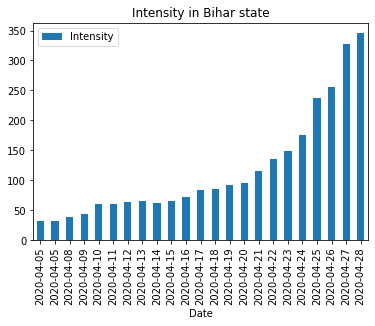

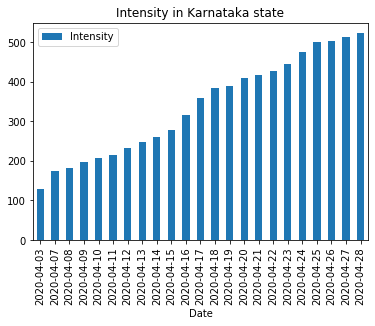

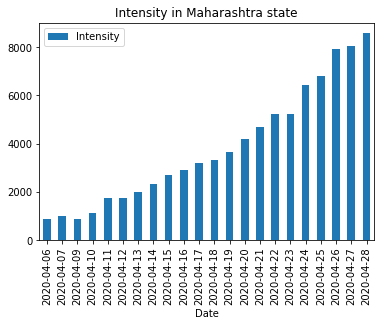

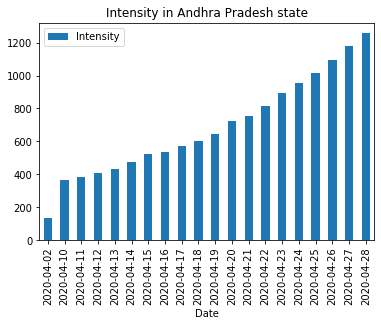

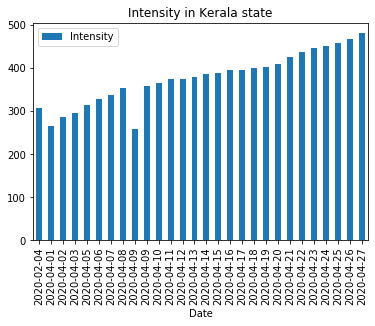

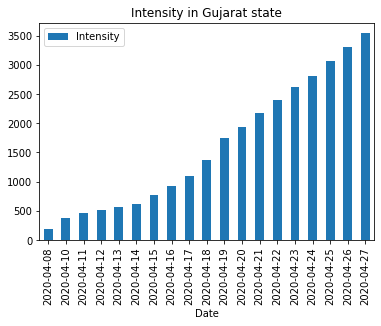

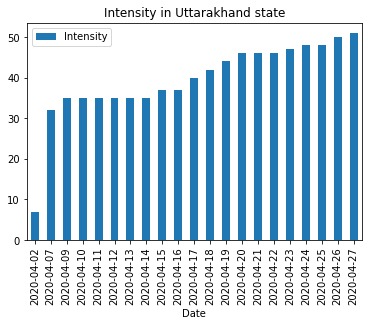

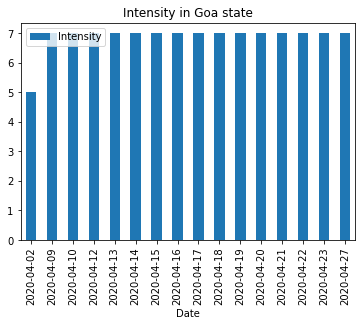

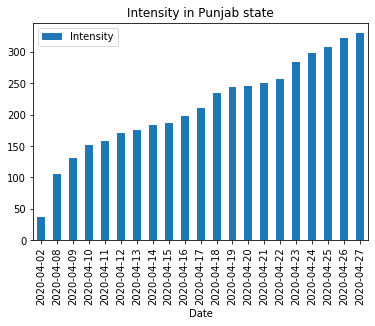

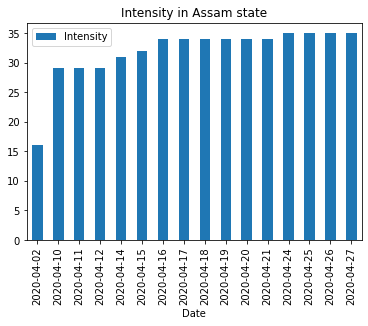

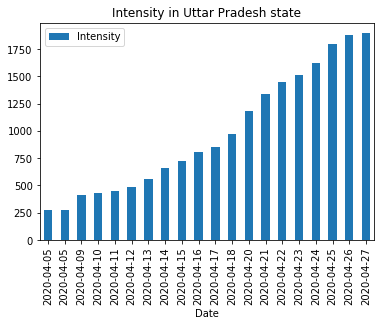

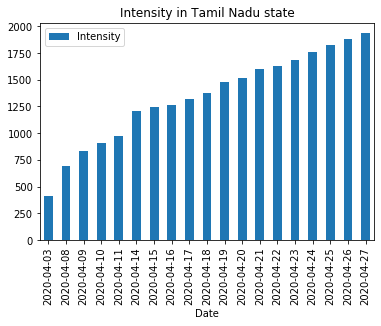

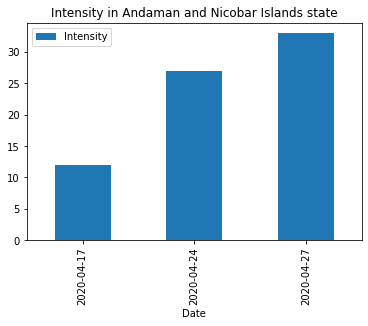

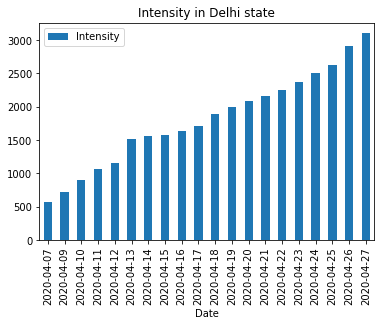

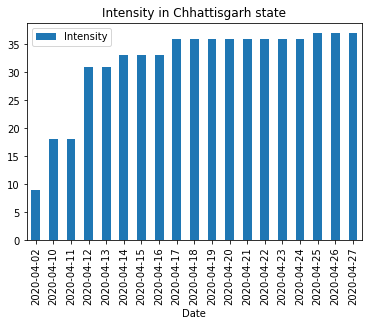

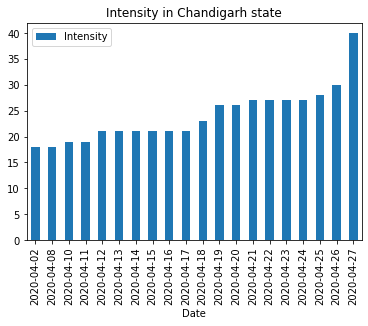

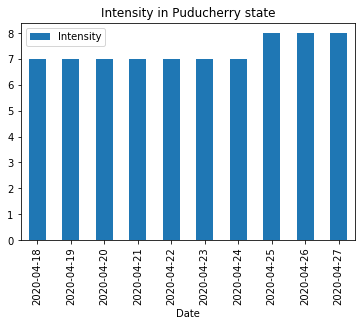

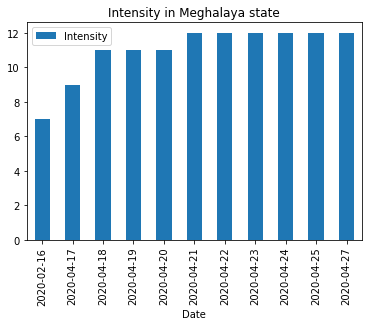

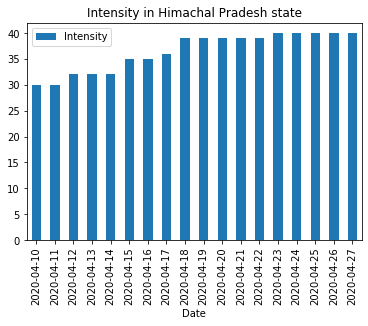

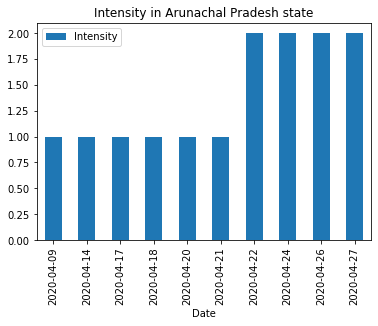

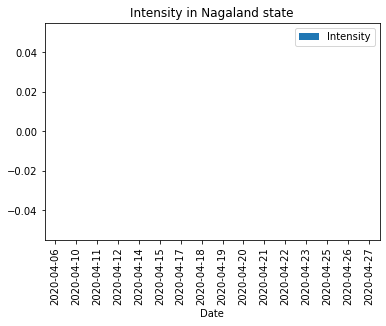

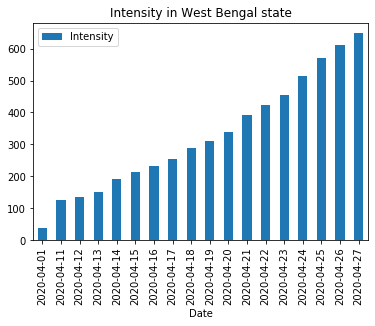

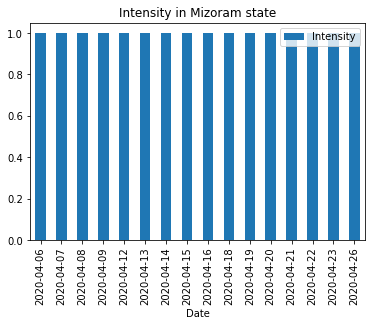

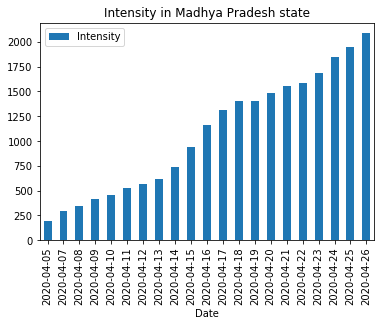

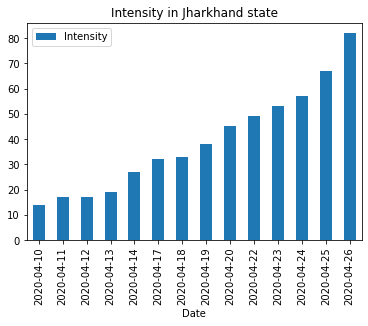

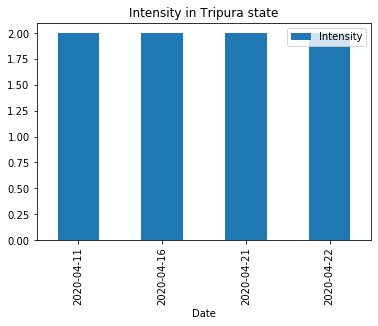

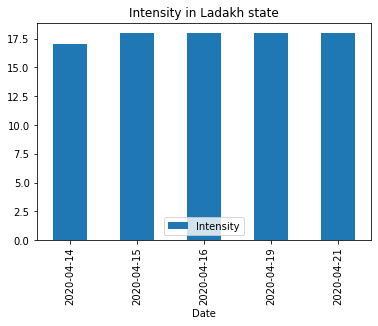

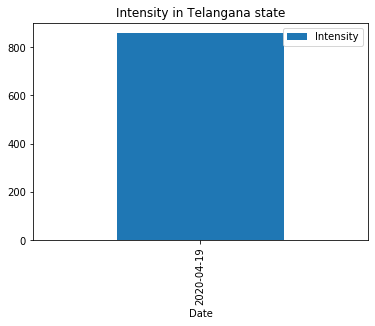

In [18]:
positives = StatewiseTestingData.sort_values(by='Date', ascending=False)[['Date', 'State', 'Positive']]
positives = positives.dropna()

for i in positives['State'].unique():
    print(i)
    statewise = positives[positives['State'] == i].copy()
#    statewise['Intensity'] = statewise['Positive'].divide(other=PopulationCensus[PopulationCensus['State / Union Territory'] == i][['Density']].iloc[0][0])
    statewise['Intensity'] = statewise['Positive']
    statewise = statewise.sort_values('Date')
    intensityplot = statewise.plot.bar(x='Date', y='Intensity', title = "Intensity in {} state".format(i))

In [19]:
IndividualDetails.isnull().sum()

id                        0
government_id         24893
diagnosed_date            0
age                   25544
gender                22577
detected_city         25543
detected_district      7650
detected_state            0
nationality           25183
current_status            0
status_change_date      110
notes                  1335
dtype: int64

In [20]:
DistrictWise = IndividualDetails.groupby('detected_district')['id'].count().reset_index()
HotSpotCities = DistrictWise[DistrictWise['id']>=10].sort_values('id',ascending=False)

In [21]:
now  = datetime.datetime.now()
IndividualDetails['diagnosed_date'] = pd.to_datetime(IndividualDetails['diagnosed_date'], format='%d/%m/%Y')

In [22]:
Last3Weeks = IndividualDetails[IndividualDetails['diagnosed_date'].dt.week>10].sort_values('diagnosed_date',ascending=True)

In [23]:
Last3Weeks['WeekID'] = Last3Weeks['diagnosed_date'].dt.week
HotSpotCount = Last3Weeks.groupby(['WeekID','detected_district','detected_state'])['id'].count().reset_index()

In [24]:
HotSpotCount = HotSpotCount[HotSpotCount['id']>=10].sort_values('WeekID',ascending=True)
HotSpotCount.head(-20)

WeekID detected_district     detected_state   id
22        11              Pune        Maharashtra   15
33        12   Bengaluru Urban          Karnataka   12
35        12          Bhilwara          Rajasthan   13
44        12         Ernakulam             Kerala   11
51        12         Hyderabad          Telangana   21
...      ...               ...                ...  ...
1266      17     West Godavari     Andhra Pradesh   16
1020      17          Anantnag  Jammu and Kashmir   45
1130      17      Kanpur Nagar      Uttar Pradesh  140
1060      17        Chandigarh         Chandigarh   10
1066      17          Chittoor     Andhra Pradesh   45

[319 rows x 4 columns]

In [25]:
HotSpotCount.groupby(['WeekID','detected_state'])['detected_district'].count().reset_index()

WeekID detected_state  detected_district
0       11    Maharashtra                  1
1       12      Karnataka                  1
2       12         Kerala                  2
3       12    Maharashtra                  2
4       12         Punjab                  1
..     ...            ...                ...
77      17         Punjab                  2
78      17      Rajasthan                  7
79      17     Tamil Nadu                  7
80      17      Telangana                  3
81      17  Uttar Pradesh                 16

[82 rows x 3 columns]

In [26]:
fig = px.line(HotSpotCount, x="WeekID", y="id",color='detected_district',title='State Wise Deaths over time',height=500,
              color_discrete_sequence = px.colors.cyclical.HSV)
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',width=700, height=600)